In [2]:
!ls

Untitled.ipynb	dataset


In [3]:
!ls dataset

test.csv  train.csv


In [6]:
import pandas as pd

In [139]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [14]:
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21189 entries, 0 to 21188
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UNC_YEAR                 21189 non-null  int64  
 1   HSCD                     21189 non-null  int64  
 2   COUNTRYCD                21189 non-null  int64  
 3   COUNTRYNM                21189 non-null  object 
 4   TRADE_COUNTRYCD          21189 non-null  int64  
 5   TRADE_HSCD               21189 non-null  int64  
 6   TARIFF_AVG               21060 non-null  float64
 7   SNDIST                   21167 non-null  float64
 8   NY_GDP_MKTP_CD           21189 non-null  int64  
 9   NY_GDP_MKTP_CD_1Y        21189 non-null  int64  
 10  SP_POP_TOTL              21189 non-null  int64  
 11  PA_NUS_FCRF              17701 non-null  float64
 12  IC_BUS_EASE_DFRN_DB      21189 non-null  float64
 13  KMDIST                   21189 non-null  float64
 14  TRADE_HSCD_COUNTRYCD  

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21189 entries, 0 to 21188
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UNC_YEAR                 21189 non-null  int64  
 1   HSCD                     21189 non-null  int64  
 2   COUNTRYCD                21189 non-null  int64  
 3   COUNTRYNM                21189 non-null  object 
 4   TRADE_COUNTRYCD          21189 non-null  int64  
 5   TRADE_HSCD               21189 non-null  float64
 6   TARIFF_AVG               20564 non-null  float64
 7   SNDIST                   21186 non-null  float64
 8   NY_GDP_MKTP_CD           21189 non-null  int64  
 9   NY_GDP_MKTP_CD_1Y        21189 non-null  int64  
 10  SP_POP_TOTL              21189 non-null  float64
 11  PA_NUS_FCRF              17701 non-null  float64
 12  IC_BUS_EASE_DFRN_DB      21189 non-null  float64
 13  KMDIST                   21189 non-null  float64
 14  TRADE_HSCD_COUNTRYCD  

None

# TabNet?

1. TabNet inputs raw tabular data _without any preprocessing_ and is trained using _gradient descent_-based optimisation.


2. TabNet use _sequential attention_ to choose featuers at each decision step, enabling _interpretability_ and better learning as the _learning capaciy is used for the most useful features._


3. _Feature selection is instance-wise_


4. TabNet employs a _single deep learning architecture_ for feature selection and reasoning, this is known as soft feature selection.


5. two knids of interpretability treatments availabilty. 


    5.1 __local interpretability__ ; visulises the imporatnce of features and how they are combined for a single row.


    5.2 __global interpretability__ ; quantifies the conritubtion of each feautres to the trained model across the dataset.

## Factor

1. Steps

The number of _Steps_ is a hyperparameter option when training the model. Increasing this will increase the __learning capacity__ of the model. but will also increase training time, memory usage and the chance of __overfitting__.

__Step__ gets its own vote in the final clasification and these votes are equally weighted. -> _ensemble classification_

2. Feature transformer

다양한 레이어들이 존재한다 , 그 레이어를 통해 매 step(final classification 으로 도출된 결과 (vote)) 를 shared 하게 됨. 각각의 layer 에는 완전연결층 , batch normalization , Gated Linear Unit activation 총 3개가 포함되어 있음. 

Attentive Transformer 그리고 Mask 를 통해 feature selection 을 할수 있음.

_Attentive Transformer_은 __fully conntected layer, batch normalisation , Sparsemax noramlisation__으로 구성되어 있음.

prior scales 라는 장치가 포함되어있는데 그건 각 feature 가 이전 step에서 얼마만큼 쓰엿는가를 확인할 수 있음 . 이를 통해 Mask 를 활용하게 되는데 이 때 Mask 는 model 이 important faeture 그리고 explainability 를 위해 활용이 됨. 

최종적으로 decision 그리고 개개인의 prediction을 호가인할 때 각각의 mask가 feature 어떻게 반영되어있는지를 이해함으로써 feature importance를 확인할 수 있음.

## TabNet uses instance-wise feature selection, which means features are selected for each input and each prediction can use different features.

__Feautre Importances__

We can view importances of our individual features which nicely add up to 1.

When we get this data out of a tree-based model it can be skewed towards one variable, or categorical variables with a large number of unique values.

In some cases, this can misrepresent what the model is actually doing.

__We see a much greater spread of importance when TabNet is used, meaning it is using features more equally.__

## Conclusion

TabNet is a deep learning model for tabular learning.

IT uses sequential attention to choose a subset of meaningful featuers to process at each decision step.

Instance-wise feature selection allows the model's learning capacity to be foucsed on the most important features and visualisation of the models' masks provide explainabillity.

# Start

## Data load

In [17]:
train

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD
0,2017,190590,12,Algeria,46052990973,19480986257,30.0,3878.238437,170163165961,159994837855,41389198,110.973017,46.109810,9954.009766,3.416326e+06,7657
1,2017,190590,36,Australia,228441691195,19480986257,0.0,12203.155980,1329188475752,1208846993740,24601860,1.304758,80.223690,8329.652344,4.387470e+08,5294788
2,2017,190590,40,Austria,166475020975,19480986257,0.0,4403.247293,417237869116,395568644341,8797566,NaN,78.856460,8289.029297,4.532064e+08,335818
3,2017,190590,56,Belgium,406412223480,19480986257,0.0,3980.375563,502698069367,475739588765,11375158,NaN,72.409200,8722.114258,7.065245e+08,173709
4,2017,190590,76,Brazil,150749493921,19480986257,18.0,9644.206941,2062831045936,1795700168991,207833831,3.191389,55.382403,18364.505860,3.132965e+07,122850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21184,2017,852852,784,United Arab Emirates,270954907547,18327708223,NaN,5643.250737,385605506855,357045064670,9487203,3.672500,77.434350,6909.236328,2.056493e+08,881214
21185,2017,852852,792,Turkey,233799651234,18327708223,NaN,4123.461111,858988610574,869683121563,81101892,3.648133,69.378820,7967.700684,1.330809e+08,9545535
21186,2017,852852,818,Egypt,66338749061,18327708223,NaN,NaN,235733695652,332441717791,96442593,17.782534,55.474280,8497.368164,NaN,1313545
21187,2017,852852,826,United Kingdom,641332371112,18327708223,NaN,4071.487776,2666229179958,2694283209613,66058859,0.776977,83.341080,8875.389648,1.142794e+09,19876811


In [18]:
train['KR_TRADE_HSCD_COUNTRYCD']

0             7657
1          5294788
2           335818
3           173709
4           122850
           ...    
21184       881214
21185      9545535
21186      1313545
21187     19876811
21188    152988098
Name: KR_TRADE_HSCD_COUNTRYCD, Length: 21189, dtype: int64

In [19]:
train.shape

(21189, 16)

## Data describe

UNC_YEAR	기준연도	YYYY

HSCD	HS Code (품목코드)	6자리 숫자코드

COUNTRYCD	ISO 국가코드	숫자코드

COUNTRYNM	영문 국가명	Character

TRADE_COUNTRYCD	해당 연도 해당 국가의 전체 품목 수입금액	US$

TRADE_HSCD	해당 연도 해당 품목의 전세계 총 수입금액	US$

TARIFF_AVG	해당 국가에서 해당 품목에 적용되는 평균 관세율	%

SNDIST	해당 국가와 수입 국가 간 평균 거리	km

NY_GDP_MKTP_CD	GDP	US$

NY_GDP_MKTP_CD_1Y	이전년도 GDP	US$

SP_POP_TOTL	인구 (연중 추정치)	명

PA_NUS_FCRF	공식 환율 (미국 달러에 대한 현지 통화 단위, 월평균을 기준으로 한 연평균)	US$

IC_BUS_EASE_DFRN_DB	비즈니스 용이성 점수	점수 (0~100)

KMDIST	해당 국가와 한국과의 거리	km

TRADE_HSCD_COUNTRYCD	해당 연도 해당 국가의 해당 품목 수입금액	US$

KR_TRADE_HSCD_COUNTRYCD	내년 해당 국가가 해당 품목을 한국으로부터 수입한 금액	US$

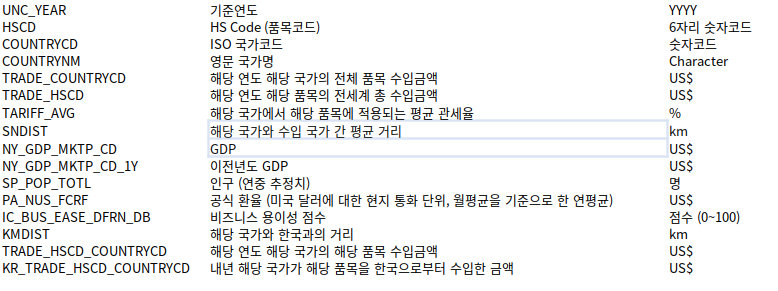

In [22]:
train.sample(5)

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD
19286,2017,841370,124,Canada,432405117520,11740537214,0.0,8020.120018,1649878054227,1528243213982,36543321,1.297936,79.540940,10617.703130,433402623.0,1027310
14638,2017,851110,104,Myanmar,19253441935,2788029589,5.0,5131.499613,68945867478,67184236747,53382581,1360.358707,42.671390,3796.142578,2055444.0,90
8645,2017,902214,344,"China, Hong Kong SAR",589317409641,5026247770,0.0,6955.600055,341244161577,320837638329,7391700,7.793250,84.760590,2095.842529,15411046.0,723587
12790,2017,852910,360,Indonesia,156925129942,5565264476,0.0,8687.850087,1015618742566,931877364178,264645886,13380.833880,64.528933,5291.683594,85727037.0,2441088
20395,2017,830160,203,Czechia,162898931578,3097417404,0.0,3745.180436,218628940952,196272068576,10594438,23.376333,76.388340,8262.062500,236017979.0,2531124


In [20]:
train.describe()

,UNC_YEAR,HSCD,COUNTRYCD,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD
count,21189.0,21189.000000,21189.00000,2.118900e+04,2.118900e+04,21060.000000,21167.000000,2.118900e+04,2.118900e+04,2.118900e+04,17701.000000,21189.000000,21189.000000,2.116800e+04,2.118900e+04
mean,2017.0,736897.468120,450.41111,3.424906e+11,1.516928e+10,3.271472,6368.110474,1.644687e+12,1.547985e+12,1.225087e+08,1993.842026,70.723435,7951.616743,3.083345e+08,1.793963e+07
std,0.0,201427.725252,254.19937,4.639194e+11,3.915677e+10,8.699236,2518.061371,3.433912e+12,3.257228e+12,2.844419e+08,6568.366701,10.562132,4054.057558,2.130044e+09,4.810033e+08
min,2017.0,190219.000000,12.00000,4.337305e+09,2.436821e+08,0.000000,1172.047241,1.142576e+10,1.118673e+10,3.113779e+06,0.303350,42.671390,955.651062,7.630000e+02,0.000000e+00
25%,2017.0,640419.000000,203.00000,6.633875e+10,2.469927e+09,0.000000,4376.303156,2.357337e+11,2.504401e+11,1.137516e+07,3.191389,64.528933,4692.671875,1.032367e+07,4.917000e+04
50%,2017.0,843131.000000,458.00000,2.132153e+11,4.849947e+09,0.000000,5624.930017,4.453453e+11,4.179836e+11,3.797483e+07,7.793250,73.394083,8262.062500,4.082173e+07,3.496490e+05
75%,2017.0,853329.000000,699.00000,4.324051e+11,1.188559e+10,5.000000,7877.524947,1.574199e+12,1.276787e+12,9.459664e+07,110.973017,78.272910,9954.009766,1.456395e+08,2.307592e+06
max,2017.0,999999.000000,842.00000,2.405277e+12,3.937064e+11,515.000000,15134.164110,1.951935e+13,1.871496e+13,1.386395e+09,33226.298150,87.166330,18375.181640,1.130730e+11,6.369533e+10


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21189 entries, 0 to 21188
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UNC_YEAR                 21189 non-null  int64  
 1   HSCD                     21189 non-null  int64  
 2   COUNTRYCD                21189 non-null  int64  
 3   COUNTRYNM                21189 non-null  object 
 4   TRADE_COUNTRYCD          21189 non-null  int64  
 5   TRADE_HSCD               21189 non-null  int64  
 6   TARIFF_AVG               21060 non-null  float64
 7   SNDIST                   21167 non-null  float64
 8   NY_GDP_MKTP_CD           21189 non-null  int64  
 9   NY_GDP_MKTP_CD_1Y        21189 non-null  int64  
 10  SP_POP_TOTL              21189 non-null  int64  
 11  PA_NUS_FCRF              17701 non-null  float64
 12  IC_BUS_EASE_DFRN_DB      21189 non-null  float64
 13  KMDIST                   21189 non-null  float64
 14  TRADE_HSCD_COUNTRYCD  

## Feature Engineering

In [161]:
train[train.apply(lambda x: "?" in list(x), axis=1)]

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD


In [175]:
# 특정값
train_0 = train.fillna(0)

# 결측값을 앞 방향
train_ff = train.fillna(method='ffill')

# 결측값을 뒷 방향
train_bb = train.fillna(method='bfill')

# 평균으로 대체
train_mean = train.fillna(train.mean())

In [176]:
## Scaling

from sklearn.preprocessing import MinMaxScaler, StandardScaler

mm_scaler = MinMaxScaler()
st_scaler = StandardScaler()

### 평균 0 

In [180]:
## dataset prepare
train_0_2 = train_0.drop(columns=['KR_TRADE_HSCD_COUNTRYCD'])
label_0 = train_0['KR_TRADE_HSCD_COUNTRYCD']

In [181]:
## splitting

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    train_0_2,
    label_0,
    test_size=0.3,
    random_state=2021,
    shuffle=True,
    #stratify=label
)

In [182]:
# 인덱스 초기화

X_train = X_train.reset_index(drop=True)
X_valid = X_valid.reset_index(drop=True)

In [183]:
# 변수 특징 확인 Good technique!!!
cat_columns = [c for c, t in zip(X_train.dtypes.index, X_train.dtypes) if t == 'O'] 
num_columns = [c for c in X_train.dtypes.index if c not in cat_columns]

In [184]:
print(f'범주형 변수: \n{cat_columns}\n\n 수치형 변수: \n{num_columns}\n')

범주형 변수: 
['COUNTRYNM']

 수치형 변수: 
['UNC_YEAR', 'HSCD', 'COUNTRYCD', 'TRADE_COUNTRYCD', 'TRADE_HSCD', 'TARIFF_AVG', 'SNDIST', 'NY_GDP_MKTP_CD', 'NY_GDP_MKTP_CD_1Y', 'SP_POP_TOTL', 'PA_NUS_FCRF', 'IC_BUS_EASE_DFRN_DB', 'KMDIST', 'TRADE_HSCD_COUNTRYCD']



In [185]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])

X_valid[num_columns] = scaler.transform(X_valid[num_columns])
# tmp_test[num_columns]  = scaler.transform(tmp_test[num_columns])

In [186]:
X_train.describe()

,UNC_YEAR,HSCD,COUNTRYCD,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD
count,14832.0,1.483200e+04,1.483200e+04,1.483200e+04,1.483200e+04,1.483200e+04,1.483200e+04,1.483200e+04,1.483200e+04,1.483200e+04,1.483200e+04,1.483200e+04,1.483200e+04,1.483200e+04
mean,0.0,4.982231e-17,6.467319e-17,-4.958278e-17,2.395303e-18,-1.916243e-17,-7.952407e-17,2.251585e-17,3.449237e-17,-1.053933e-17,1.916243e-18,-1.141841e-15,1.852767e-16,-3.832485e-18
std,0.0,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00
min,0.0,-2.706398e+00,-1.725224e+00,-7.285915e-01,-3.799686e-01,-3.564001e-01,-2.524921e+00,-4.772800e-01,-4.735058e-01,-4.205185e-01,-2.773003e-01,-2.653835e+00,-1.721127e+00,-1.435761e-01
25%,0.0,-4.768244e-01,-8.310869e-01,-5.945600e-01,-3.234694e-01,-3.564001e-01,-7.840818e-01,-4.152781e-01,-4.137873e-01,-3.912727e-01,-2.771371e-01,-8.243749e-01,-8.027991e-01,-1.387743e-01
50%,0.0,5.270879e-01,3.153879e-02,-2.770502e-01,-2.623012e-01,-3.564001e-01,-2.955801e-01,-3.505868e-01,-3.483403e-01,-2.971082e-01,-2.765983e-01,2.606673e-01,7.433595e-02,-1.244914e-01
75%,0.0,5.776470e-01,9.808209e-01,1.967828e-01,-8.451193e-02,1.777852e-01,5.999946e-01,-2.099093e-02,-8.409881e-02,-9.666334e-02,-2.677769e-01,7.234962e-01,4.901117e-01,-7.582339e-02
max,0.0,1.303962e+00,1.544088e+00,4.461632e+00,9.605612e+00,5.466468e+01,3.357806e+00,5.218525e+00,5.281377e+00,4.476386e+00,5.146289e+00,1.567169e+00,2.559514e+00,5.293411e+01


In [187]:
from sklearn.preprocessing import OneHotEncoder

tmp_all = pd.concat([X_train, X_valid])

ohe = OneHotEncoder(sparse=False)
ohe.fit(tmp_all[cat_columns])

OneHotEncoder(sparse=False)

In [188]:
ohe.categories_

[array(['Algeria', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada',
        'Chile', 'China', 'China, Hong Kong SAR', 'Czechia', 'Egypt',
        'France', 'Germany', 'Guatemala', 'India', 'Indonesia', 'Iran',
        'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Malaysia', 'Mexico',
        'Mongolia', 'Myanmar', 'Netherlands', 'New Zealand', 'Norway',
        'Peru', 'Philippines', 'Poland', 'Russian Federation',
        'Saudi Arabia', 'Singapore', 'South Africa', 'Spain', 'Sri Lanka',
        'Switzerland', 'Turkey', 'USA', 'United Arab Emirates',
        'United Kingdom', 'Viet Nam'], dtype=object)]

In [189]:
ohe_columns = list()
for lst in ohe.categories_:
    ohe_columns += lst.tolist()

In [190]:
new_train_cat = pd.DataFrame(ohe.transform(X_train[cat_columns]), columns=ohe_columns)
new_valid_cat = pd.DataFrame(ohe.transform(X_valid[cat_columns]), columns=ohe_columns)

In [191]:
new_train_cat.head()

,Algeria,Australia,Austria,Belgium,Brazil,Canada,Chile,China,"China, Hong Kong SAR",Czechia,...,Singapore,South Africa,Spain,Sri Lanka,Switzerland,Turkey,USA,United Arab Emirates,United Kingdom,Viet Nam
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [192]:
# 그냥 pd.get.dummies 로 했어도 될지 모르는 technique...

X_train = pd.concat([X_train, new_train_cat], axis=1)
X_valid = pd.concat([X_valid, new_valid_cat], axis=1)

In [193]:
# 기존 범주형 변수 제거

X_train = X_train.drop(columns=cat_columns)
X_valid = X_valid.drop(columns=cat_columns)

In [194]:
X_train.columns

Index(['UNC_YEAR', 'HSCD', 'COUNTRYCD', 'TRADE_COUNTRYCD', 'TRADE_HSCD',
       'TARIFF_AVG', 'SNDIST', 'NY_GDP_MKTP_CD', 'NY_GDP_MKTP_CD_1Y',
       'SP_POP_TOTL', 'PA_NUS_FCRF', 'IC_BUS_EASE_DFRN_DB', 'KMDIST',
       'TRADE_HSCD_COUNTRYCD', 'Algeria', 'Australia', 'Austria', 'Belgium',
       'Brazil', 'Canada', 'Chile', 'China', 'China, Hong Kong SAR', 'Czechia',
       'Egypt', 'France', 'Germany', 'Guatemala', 'India', 'Indonesia', 'Iran',
       'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Malaysia', 'Mexico',
       'Mongolia', 'Myanmar', 'Netherlands', 'New Zealand', 'Norway', 'Peru',
       'Philippines', 'Poland', 'Russian Federation', 'Saudi Arabia',
       'Singapore', 'South Africa', 'Spain', 'Sri Lanka', 'Switzerland',
       'Turkey', 'USA', 'United Arab Emirates', 'United Kingdom', 'Viet Nam'],
      dtype='object')

In [ ]:
# dummies = pd.get_dummies(X_train['COUNTRYNM'], dummy_na=True)
# X_train = pd.concat([X_train,dummies],axis=1).drop(columns='COUNTRYNM')

# Model - baseline

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [203]:
from sklearn.metrics import mean_absolute_error

## Evaluation Usage

In [ ]:
# >>> from sklearn.metrics import median_absolute_error
# >>> y_true = [3, -0.5, 2, 7]
# >>> y_pred = [2.5, 0.0, 2, 8]
# >>> median_absolute_error(y_true, y_pred)

### Logistic Regreesion

#### Error occur

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
LogisticRegression()

In [207]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_valid)

print(f'Logistic Regression MAE Score: {mean_absolute_error(y_valid, y_pred)}')

Logistic Regression MAE Score: 28357149.84694038


### SVR

In [233]:
svr = SVR()

svr.fit(X_train, y_train)

y_pred = svr.predict(X_valid)

print(f'SVR MAE score: {mean_absolute_error(y_valid, y_pred)}')

SVR MAE score: 24497300.902226258


### Random Forest

In [237]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_valid)

print(f'rf MAE score: {mean_absolute_error(y_valid, y_pred)}')

rf MAE score: 24315769.741121598


In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

### XGBoost

In [239]:
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_valid)

print(f'XGB MAE score: {mean_absolute_error(y_valid, y_pred)}')

XGB MAE score: 23529977.663924858


### LightGBM

In [242]:
# error solution ; Do not support special JSON characters in feature name
import re
X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [243]:
lgb = LGBMRegressor(tree_method='gpu_hist')

lgb.fit(X_train, y_train)

y_pred = lgb.predict(X_valid)

print(f'LGB MAE score: {mean_absolute_error(y_valid, y_pred)}')

LGB MAE score: 26259147.689219393


In [246]:
train.columns

Index(['UNC_YEAR', 'HSCD', 'COUNTRYCD', 'COUNTRYNM', 'TRADE_COUNTRYCD',
       'TRADE_HSCD', 'TARIFF_AVG', 'SNDIST', 'NY_GDP_MKTP_CD',
       'NY_GDP_MKTP_CD_1Y', 'SP_POP_TOTL', 'PA_NUS_FCRF',
       'IC_BUS_EASE_DFRN_DB', 'KMDIST', 'TRADE_HSCD_COUNTRYCD',
       'KR_TRADE_HSCD_COUNTRYCD'],
      dtype='object')

In [248]:
train['KR_TRADE_HSCD_COUNTRYCD'].describe()

count    2.118900e+04
mean     1.793963e+07
std      4.810033e+08
min      0.000000e+00
25%      4.917000e+04
50%      3.496490e+05
75%      2.307592e+06
max      6.369533e+10
Name: KR_TRADE_HSCD_COUNTRYCD, dtype: float64

In [252]:
display(min(train['KR_TRADE_HSCD_COUNTRYCD']))
display(max(train['KR_TRADE_HSCD_COUNTRYCD']))

0

63695330669

# model - tabnet

[Good simple Example](https://www.kaggle.com/carlmcbrideellis/tabnet-a-very-simple-regression-example)

In [73]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor

In [222]:
y_train_2 = np.log1p(y_train)
y_valid_2 = np.log1p(y_valid)

In [224]:
X_train_2 = X_train.to_numpy()
X_valid_2 = X_valid.to_numpy()
y_train_2 = y_train.to_numpy().reshape(-1,1)
y_valid_2 = y_valid.to_numpy().reshape(-1,1)

In [227]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [228]:
clf = TabNetRegressor()
clf.fit(
    X_train_2, y_train_2,
    eval_set = [(X_valid_2, y_valid_2)]
)

preds = clf.predict(X_test)

Device used : cuda


RuntimeError: CUDA error: all CUDA-capable devices are busy or unavailable

# Homework

- including tabnet prediction values and applying the stacking technique

- Attempting the model at server 

[ensemble](https://www.kaggle.com/kcs93023/kakr-4th-seminar-model-validation-ensemble)

[kaggle 1st solution](https://www.kaggle.com/jesucristo/1-house-prices-solution-top-1?scriptVersionId=12846740)